In [3]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193269 sha256=85df44334ec307a2f97c70e22c2c98114320463d689551a5db16270c7cd7c1cf
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod



On Training Data:
ECOD ROC:0.9953, precision @ rank n:0.8252

On Test Data:
ECOD ROC:0.996, precision @ rank n:0.8079


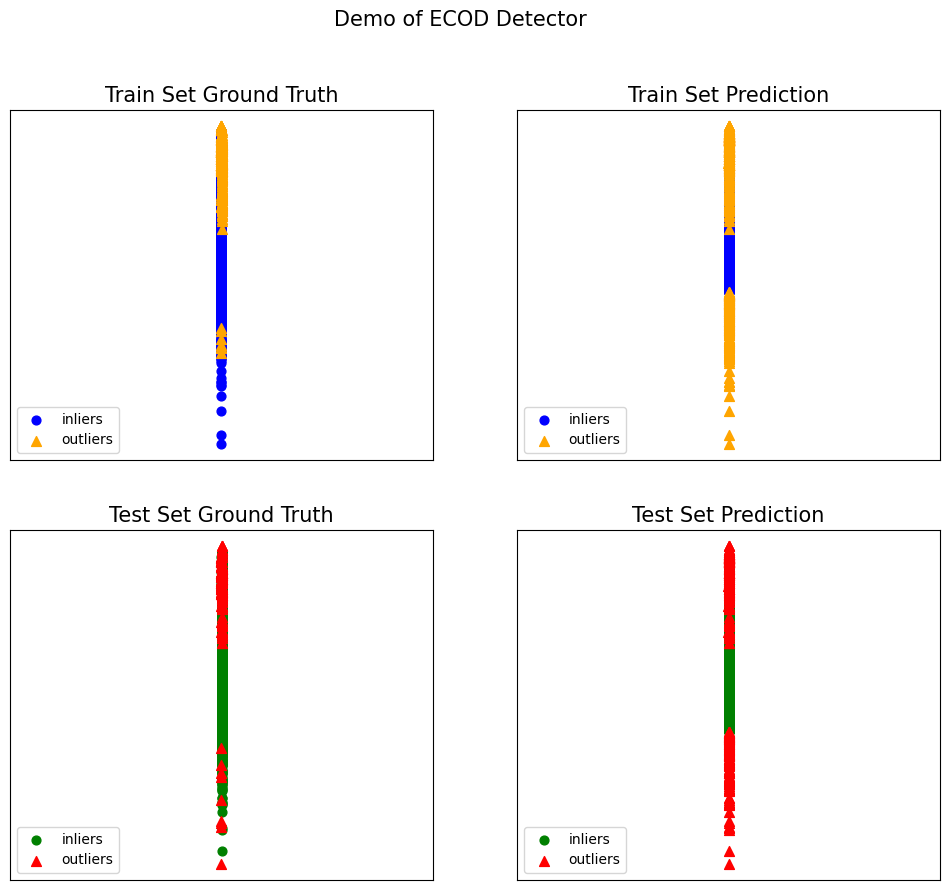

In [21]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.copod import COPOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

if __name__ == "__main__":
    # contamination = 0.1  # percentage of outliers
    # n_train = 2000  # number of training points
    # n_test = 1000  # number of testing points

    # # Generate sample data
    # X_train, X_test, y_train, y_test = \
    #     generate_data(n_train=n_train,
    #                   n_test=n_test,
    #                   n_features=2,
    #                   contamination=contamination,
    #                   random_state=42)

    # train ECOD detector
    clf_name = 'ECOD'
    clf = ECOD()

    # you could try parallel version as well.
    # clf = ECOD(n_jobs=2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

In [ ]:
print(y_train)

[0. 0. 0. ... 1. 1. 1.]


In [15]:
import pandas as pd
data = pd.read_csv("/content/WEC_Sydney_49_with_anomalies.csv")
data.head()
# data.dropna()

,Unnamed: 0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,...,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power,Is_Anomaly
0,0,1.0,1.0,0.00,70.00,1.00,140.0,50.00,198.0,401.0,...,70674.49,70972.33,90957.03,90903.63,87876.82,79499.23,68880.39,0.78,4065416.61,0
1,1,598.0,0.0,595.82,77.69,593.70,150.0,549.00,198.0,798.0,...,70665.50,69963.48,84511.25,85691.70,85211.51,76678.20,76119.53,0.76,3951216.37,0
2,2,198.0,0.0,197.46,75.19,192.94,150.0,87.64,198.0,398.0,...,77808.44,73519.82,91436.35,88770.60,86632.78,77932.46,69343.12,0.78,4022640.78,0
3,3,598.0,0.0,596.97,69.41,592.69,143.8,549.00,198.0,398.0,...,71668.05,69380.67,85191.27,84453.12,85300.41,78573.25,72527.16,0.75,3879223.41,0
4,4,198.0,0.0,197.18,79.83,192.97,150.0,89.53,198.0,398.0,...,79075.06,74354.03,85254.75,86978.69,86951.65,77671.87,74901.38,0.77,3974691.24,0


In [16]:
array = data[['Y45', 'Total_Power']]

In [17]:
final = array.values
print(final)

[[8.00000000e+02 4.06541661e+06]
 [8.00000000e+02 3.95121637e+06]
 [8.00000000e+02 4.02264078e+06]
 ...
 [8.00000000e+02 4.11134129e+06]
 [8.00000000e+02 4.10021973e+06]
 [8.00000000e+02 4.01100025e+06]]


In [18]:
print(len(final))

17964


In [19]:
y = data['Is_Anomaly'].values
print(len(y))

17964


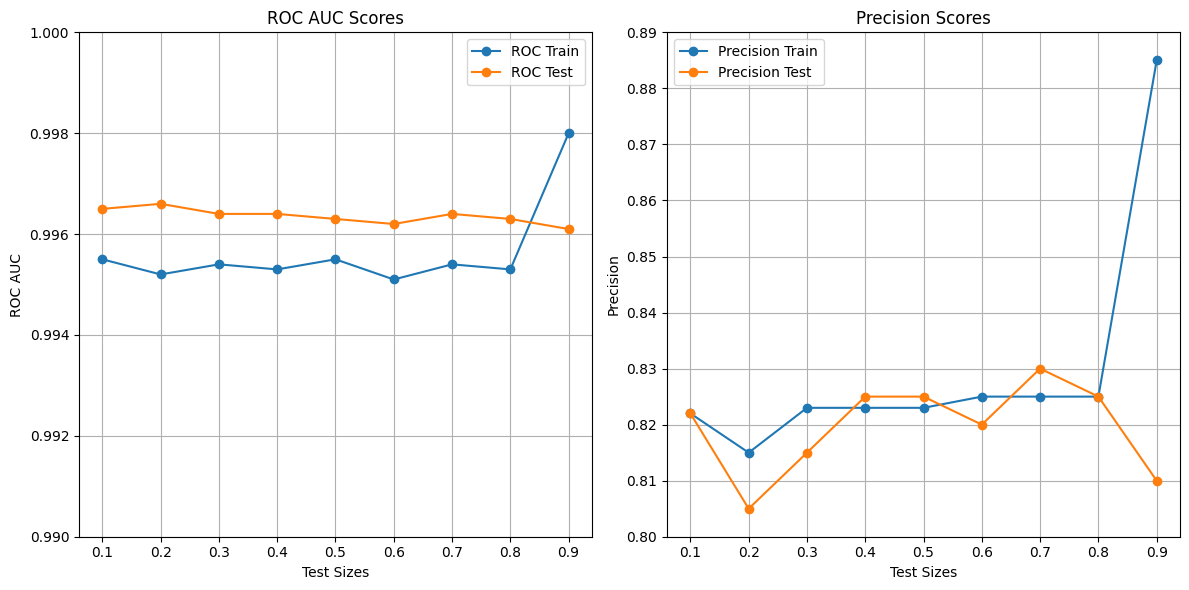

In [12]:
import matplotlib.pyplot as plt

# Data
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
roc_train =  [0.9955, 0.9952, 0.9954, 0.9953, 0.9955, 0.9951, 0.9954, 0.9953, 0.998]
roc_test = [0.9965, 0.9966, 0.9964, 0.9964, 0.9963, 0.9962, 0.9964, 0.9963, 0.9961]
prn_train = [0.822, 0.815, 0.823, 0.823, 0.823, 0.825, 0.825, 0.825, 0.885]
prn_test = [0.822, 0.805, 0.815, 0.825, 0.825, 0.82, 0.83, 0.825, 0.81]

# Plotting
plt.figure(figsize=(12, 6))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(sizes, roc_train, label='ROC Train', marker='o')
plt.plot(sizes, roc_test, label='ROC Test', marker='o')
plt.ylim([0.99, 1])
plt.xlabel('Test Sizes')
plt.ylabel('ROC AUC')
plt.title('ROC AUC Scores')
plt.legend()
plt.grid(True)

# PRN curve
plt.subplot(1, 2, 2)
plt.plot(sizes, prn_train, label='Precision Train', marker='o')
plt.plot(sizes, prn_test, label='Precision Test', marker='o')
plt.ylim([0.8, 0.89])
plt.xlabel('Test Sizes')
plt.ylabel('Precision')
plt.title('Precision Scores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final, y, test_size = 0.3, random_state=42)
print(len(X_train))

12574



On Training Data:
ECOD ROC:0.9562, precision @ rank n:0.65

On Test Data:
ECOD ROC:0.935, precision @ rank n:0.4


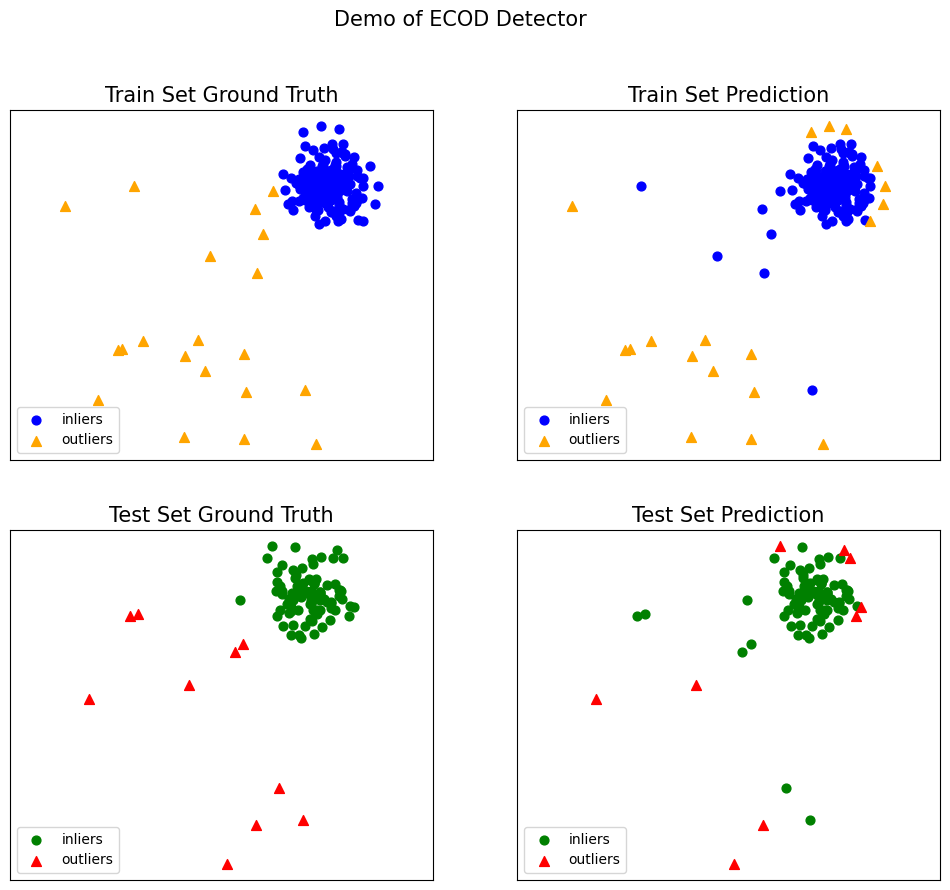

In [11]:
# -*- coding: utf-8 -*-
"""Example of using ECOD for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train ECOD detector
    clf_name = 'ECOD'
    clf = ECOD()

    # you could try parallel version as well.
    # clf = ECOD(n_jobs=2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)